In [16]:
# Cell 1 — mount drive (Colab) & imports
from google.colab import drive           # comment/remove if using local VS Code
drive.mount('/content/drive')

import os, warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for enhanced visualizations
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Cell 2 — load datasets (edit paths if needed)
DAY_PATH = "/content/drive/MyDrive/day.csv"   # change if your file is in a folder
HOUR_PATH = "/content/drive/MyDrive/hour.csv"

day = pd.read_csv(DAY_PATH)
hour = pd.read_csv(HOUR_PATH)

# parse datetimes (safe guard)
day['dteday'] = pd.to_datetime(day['dteday'])
if 'dteday' in hour.columns:
    hour['dteday'] = pd.to_datetime(hour['dteday'])

print("day shape:", day.shape)
print("hour shape:", hour.shape)

# peek first 2 rows for each
display(day.head(2))
display(hour.head(2))


day shape: (731, 16)
hour shape: (17379, 17)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [18]:
# Cell 3 — schema, dtypes and null counts
print("=== day columns and dtypes ===")
print(day.dtypes)
print("\nNull counts (day):")
print(day.isnull().sum())

print("\n=== hour columns and dtypes ===")
print(hour.dtypes)
print("\nNull counts (hour):")
print(hour.isnull().sum())


=== day columns and dtypes ===
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Null counts (day):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

=== hour columns and dtypes ===
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     i

day cnt stats:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


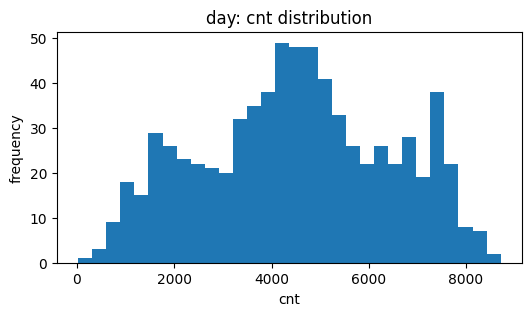


hour cnt stats:
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


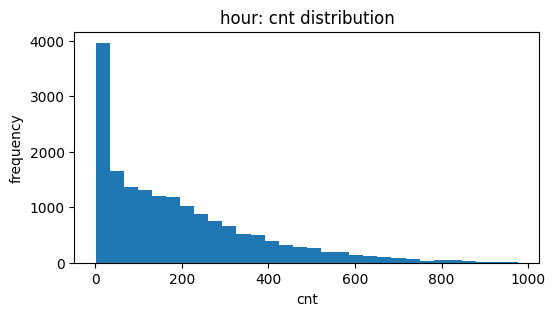

In [19]:
# Cell 4 — target quick stats + histogram (day)
print("day cnt stats:")
print(day['cnt'].describe())

plt.figure(figsize=(6,3))
plt.hist(day['cnt'], bins=30)
plt.title("day: cnt distribution")
plt.xlabel("cnt")
plt.ylabel("frequency")
plt.show()

# and for hour (optional)
print("\nhour cnt stats:")
print(hour['cnt'].describe())

plt.figure(figsize=(6,3))
plt.hist(hour['cnt'], bins=30)
plt.title("hour: cnt distribution")
plt.xlabel("cnt")
plt.ylabel("frequency")
plt.show()


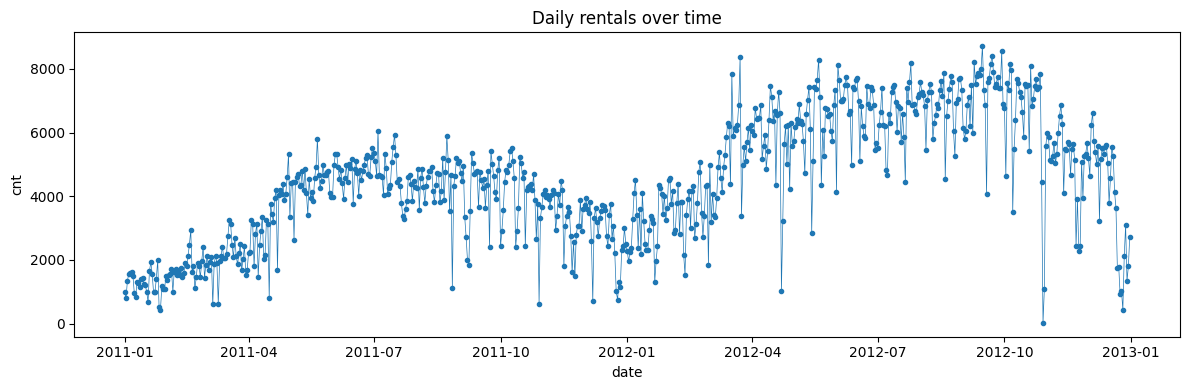

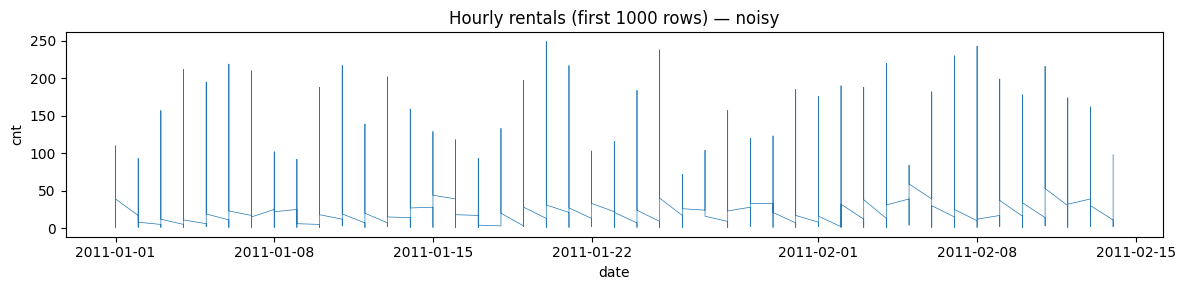

In [20]:
# Cell 5 — simple time-series plot (day)
plt.figure(figsize=(12,4))
plt.plot(day['dteday'], day['cnt'], marker='.', linewidth=0.5)
plt.title("Daily rentals over time")
plt.xlabel("date"); plt.ylabel("cnt")
plt.tight_layout()
plt.show()

# Hour (plot a subset, hourly can be noisy)
plt.figure(figsize=(12,3))
plt.plot(hour['dteday'].iloc[:1000], hour['cnt'].iloc[:1000], linewidth=0.5)
plt.title("Hourly rentals (first 1000 rows) — noisy")
plt.xlabel("date"); plt.ylabel("cnt")
plt.tight_layout()
plt.show()


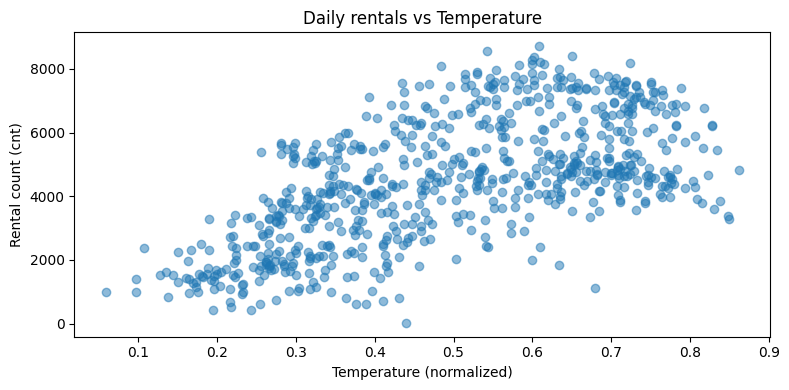

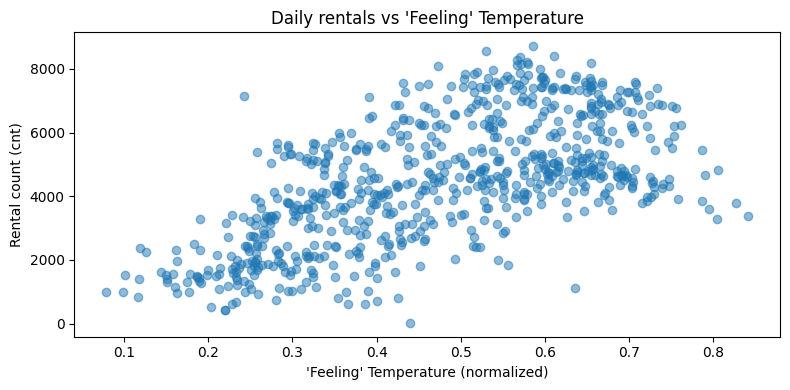

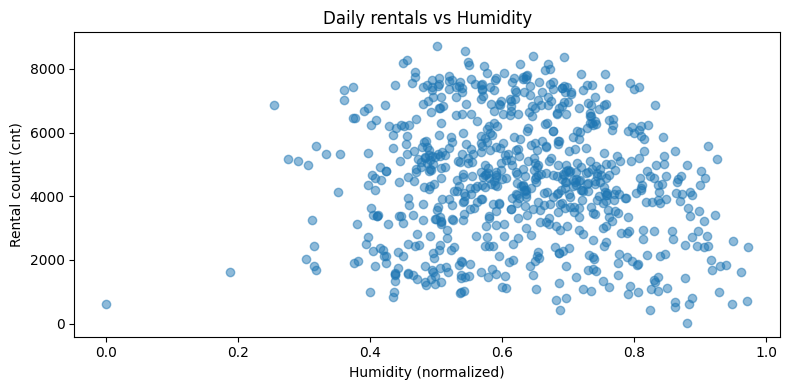

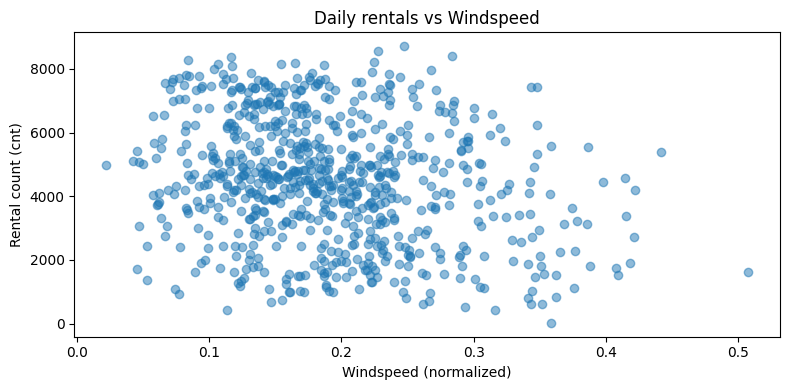

In [21]:
# Cell 8 — Scatter plots for numerical features vs cnt (day)

# Scatter plot of cnt vs temp
plt.figure(figsize=(8, 4))
plt.scatter(day['temp'], day['cnt'], alpha=0.5)
plt.title("Daily rentals vs Temperature")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Rental count (cnt)")
plt.tight_layout()
plt.show()

# Scatter plot of cnt vs atemp
plt.figure(figsize=(8, 4))
plt.scatter(day['atemp'], day['cnt'], alpha=0.5)
plt.title("Daily rentals vs 'Feeling' Temperature")
plt.xlabel("'Feeling' Temperature (normalized)")
plt.ylabel("Rental count (cnt)")
plt.tight_layout()
plt.show()

# Scatter plot of cnt vs hum
plt.figure(figsize=(8, 4))
plt.scatter(day['hum'], day['cnt'], alpha=0.5)
plt.title("Daily rentals vs Humidity")
plt.xlabel("Humidity (normalized)")
plt.ylabel("Rental count (cnt)")
plt.tight_layout()
plt.show()

# Scatter plot of cnt vs windspeed
plt.figure(figsize=(8, 4))
plt.scatter(day['windspeed'], day['cnt'], alpha=0.5)
plt.title("Daily rentals vs Windspeed")
plt.xlabel("Windspeed (normalized)")
plt.ylabel("Rental count (cnt)")
plt.tight_layout()
plt.show()

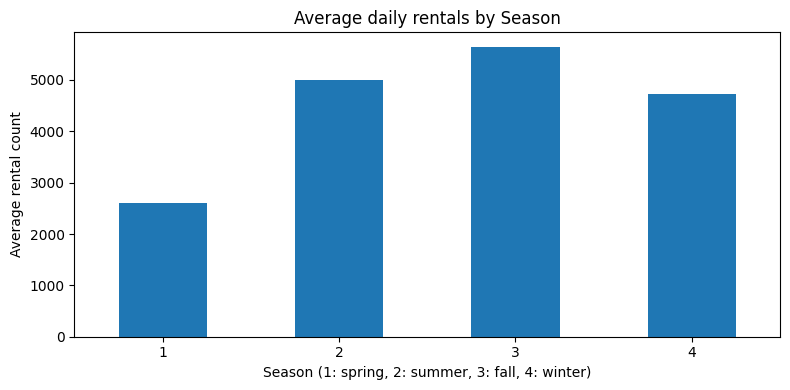

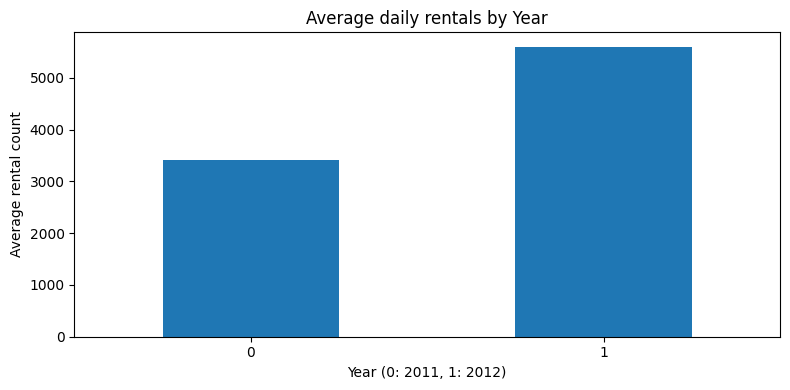

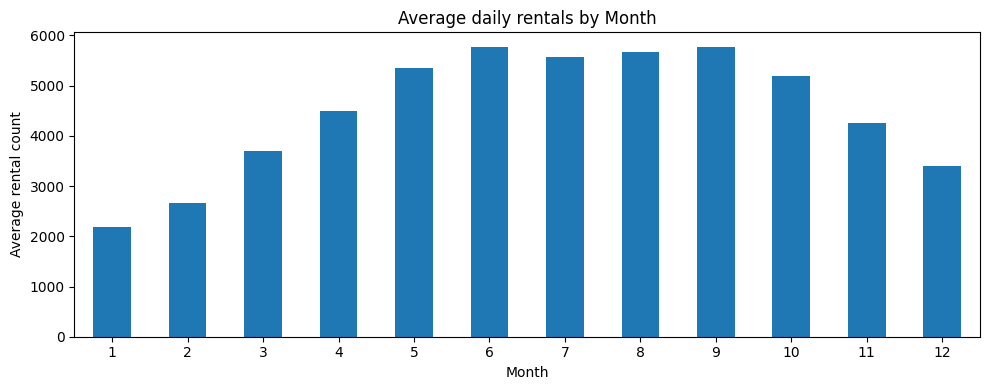

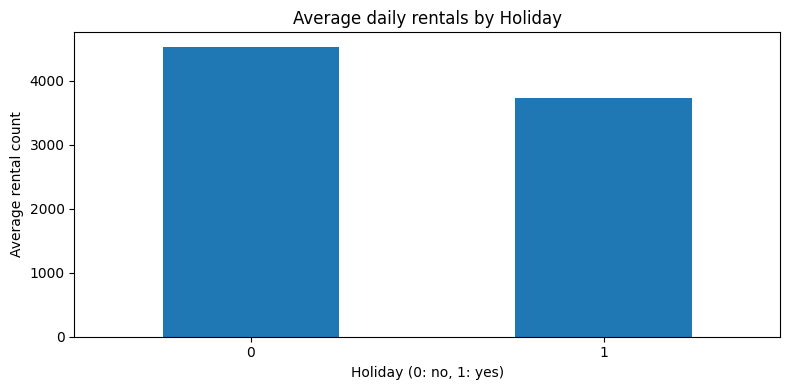

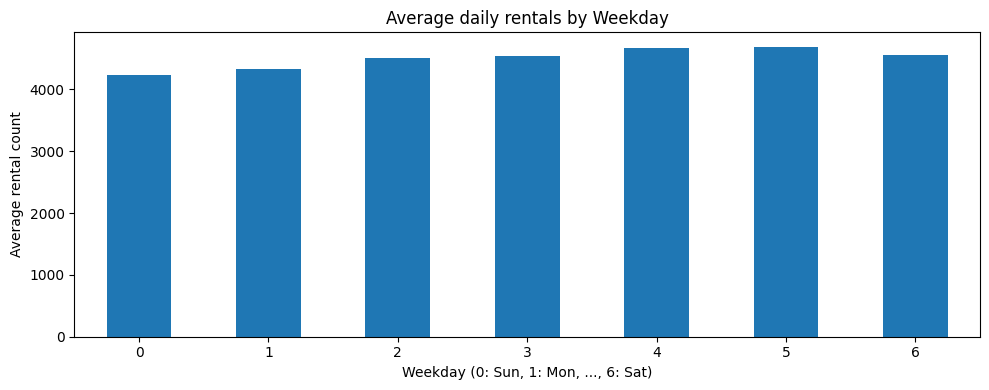

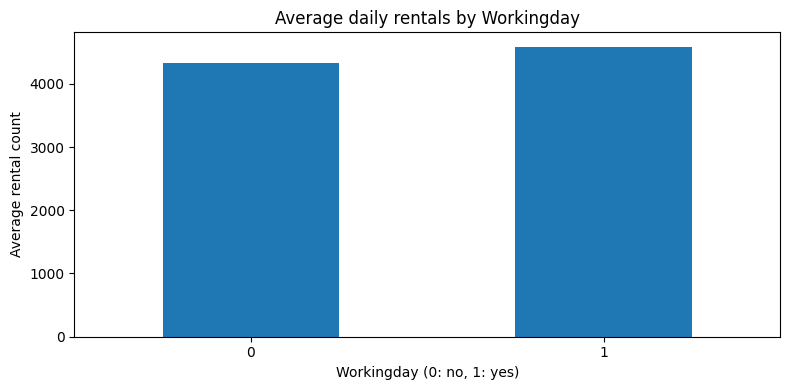

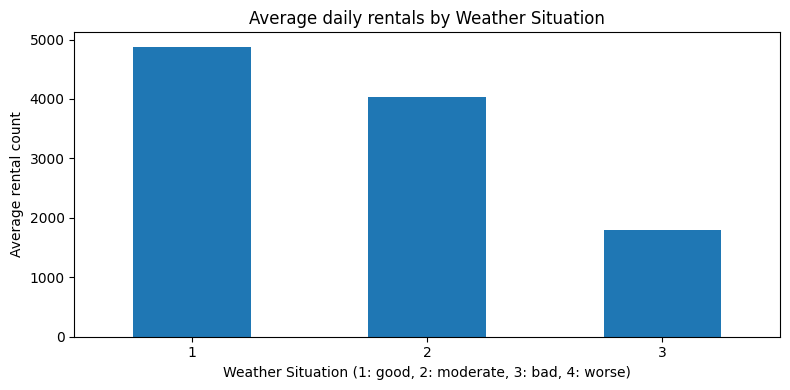

In [22]:
# Bar plot of cnt vs season
plt.figure(figsize=(8, 4))
day.groupby('season')['cnt'].mean().plot(kind='bar')
plt.title("Average daily rentals by Season")
plt.xlabel("Season (1: spring, 2: summer, 3: fall, 4: winter)")
plt.ylabel("Average rental count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of cnt vs year
plt.figure(figsize=(8, 4))
day.groupby('yr')['cnt'].mean().plot(kind='bar')
plt.title("Average daily rentals by Year")
plt.xlabel("Year (0: 2011, 1: 2012)")
plt.ylabel("Average rental count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of cnt vs month
plt.figure(figsize=(10, 4))
day.groupby('mnth')['cnt'].mean().plot(kind='bar')
plt.title("Average daily rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average rental count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of cnt vs holiday
plt.figure(figsize=(8, 4))
day.groupby('holiday')['cnt'].mean().plot(kind='bar')
plt.title("Average daily rentals by Holiday")
plt.xlabel("Holiday (0: no, 1: yes)")
plt.ylabel("Average rental count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of cnt vs weekday
plt.figure(figsize=(10, 4))
day.groupby('weekday')['cnt'].mean().plot(kind='bar')
plt.title("Average daily rentals by Weekday")
plt.xlabel("Weekday (0: Sun, 1: Mon, ..., 6: Sat)")
plt.ylabel("Average rental count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of cnt vs workingday
plt.figure(figsize=(8, 4))
day.groupby('workingday')['cnt'].mean().plot(kind='bar')
plt.title("Average daily rentals by Workingday")
plt.xlabel("Workingday (0: no, 1: yes)")
plt.ylabel("Average rental count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of cnt vs weathersit
plt.figure(figsize=(8, 4))
day.groupby('weathersit')['cnt'].mean().plot(kind='bar')
plt.title("Average daily rentals by Weather Situation")
plt.xlabel("Weather Situation (1: good, 2: moderate, 3: bad, 4: worse)")
plt.ylabel("Average rental count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Explore hourly data

### Subtask:
Conduct exploratory data analysis on the `hour` dataset, similar to what was done for the `day` dataset, to understand hourly patterns in bike rentals.


**Reasoning**:
Generate a histogram for the `cnt` column in the `hour` DataFrame, create a time series plot for the `cnt` column in the `hour` DataFrame over time, calculate and display the correlation matrix for the numerical features in the `hour` DataFrame, generate scatter plots for each numerical feature against `cnt`, and create bar plots for the average `cnt` for each category of the categorical features in the `hour` DataFrame, as requested by the instructions.



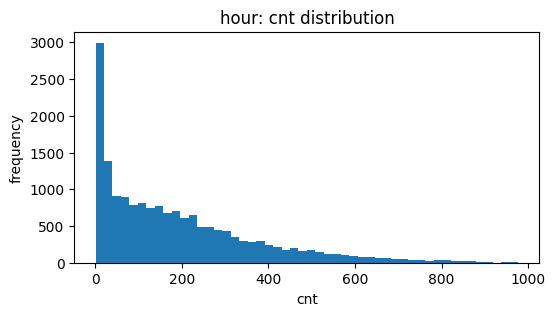

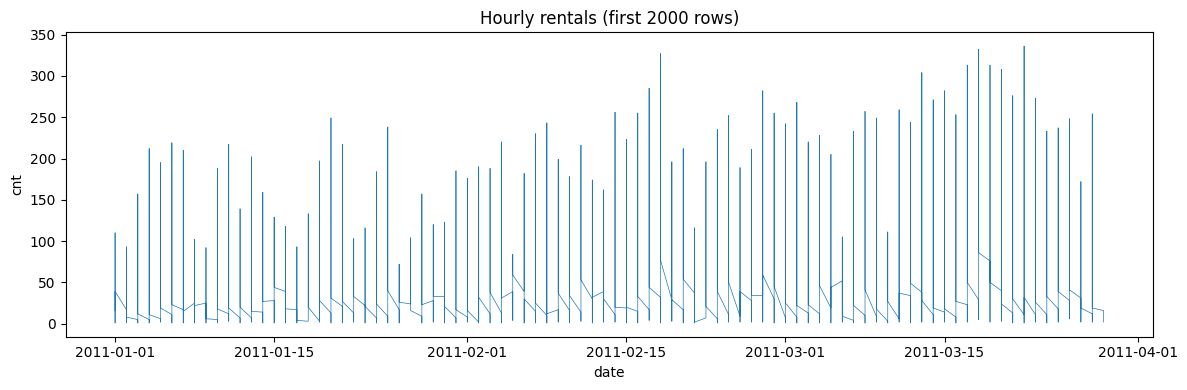


Correlation matrix (hour):


,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


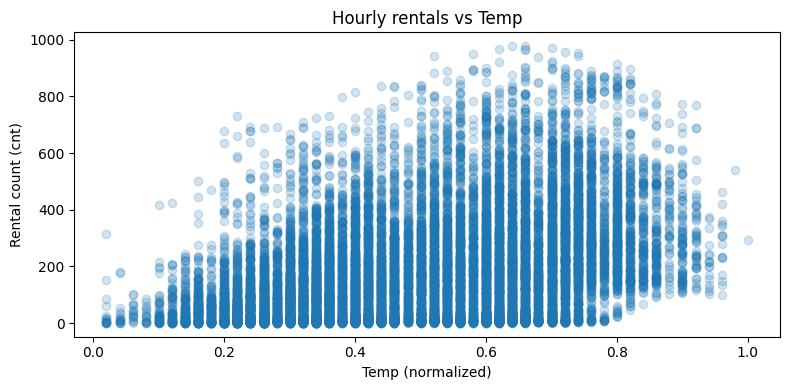

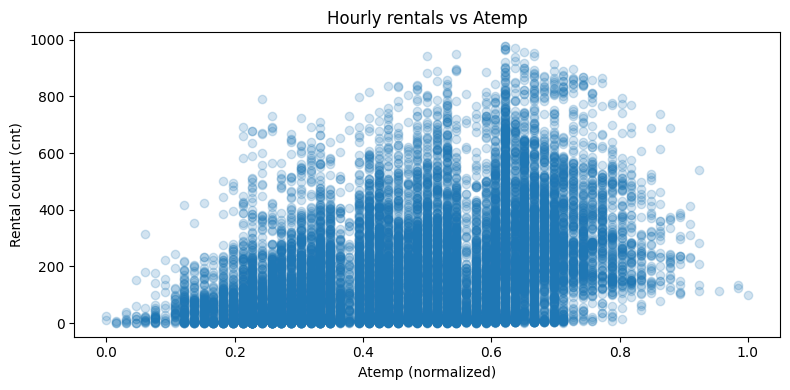

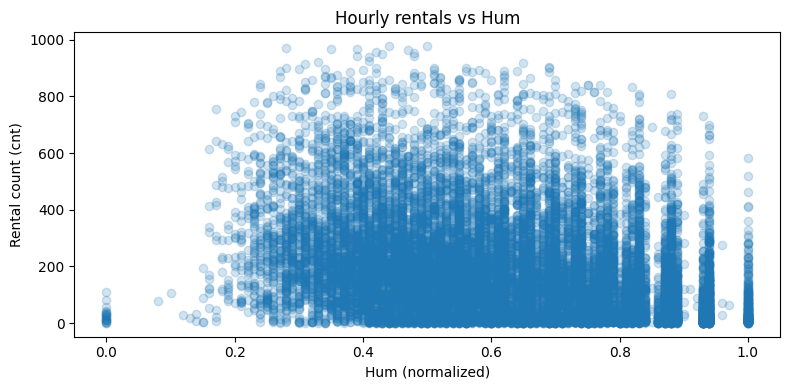

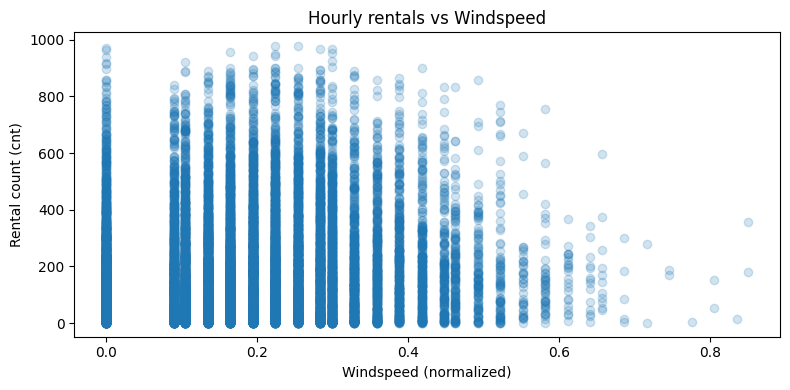

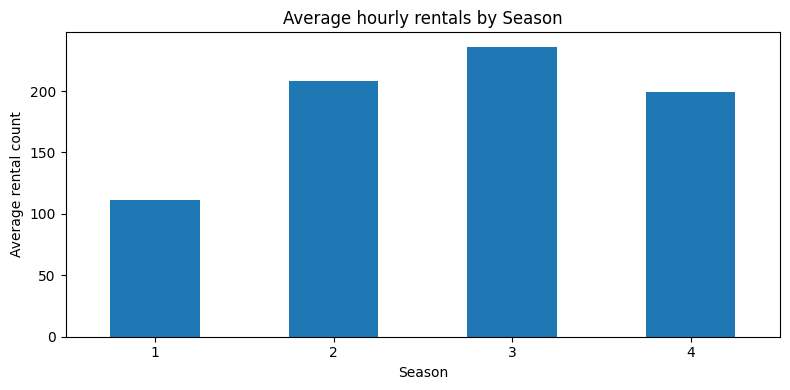

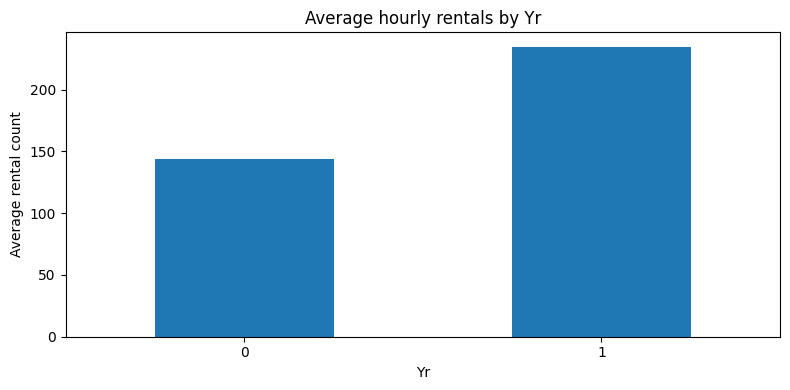

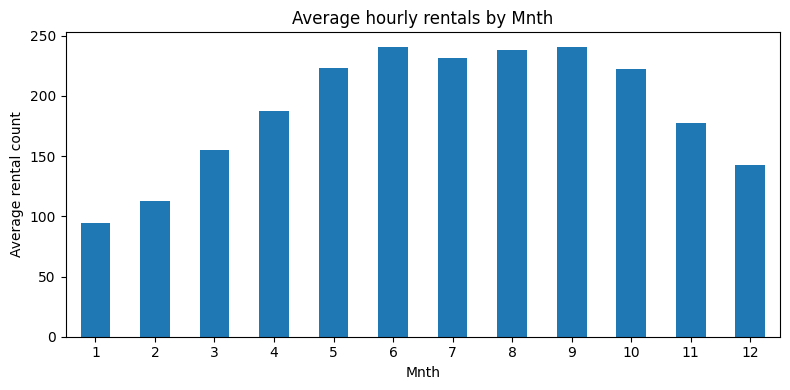

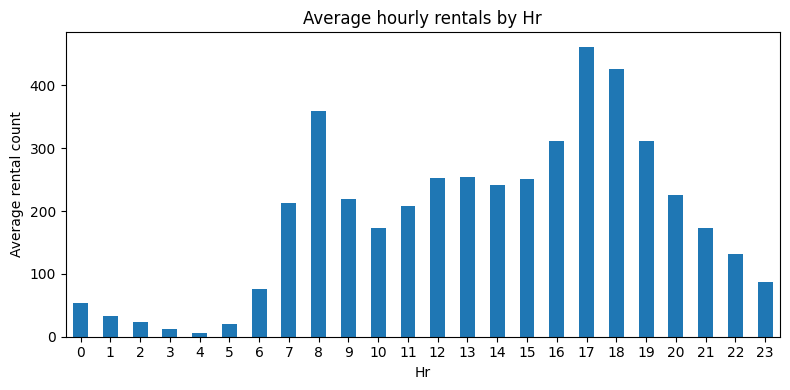

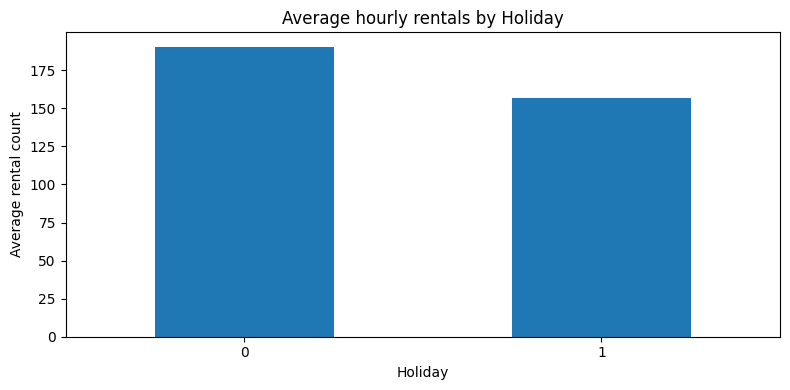

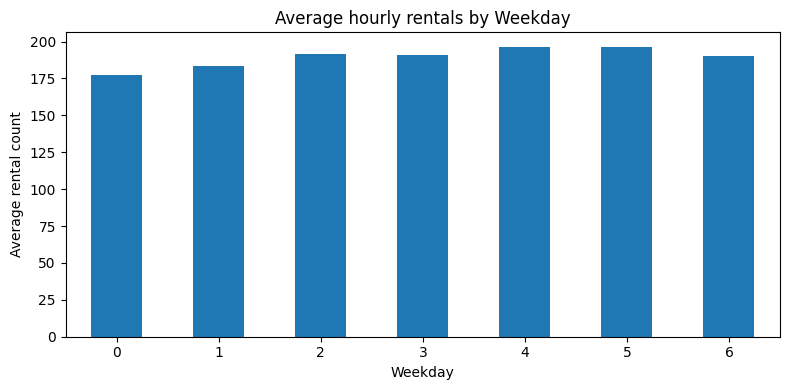

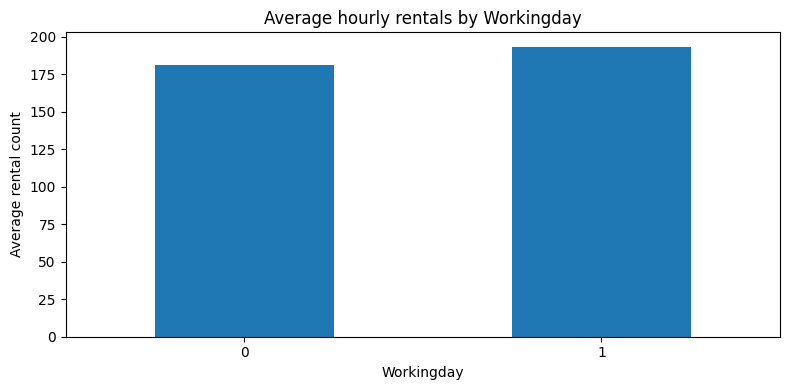

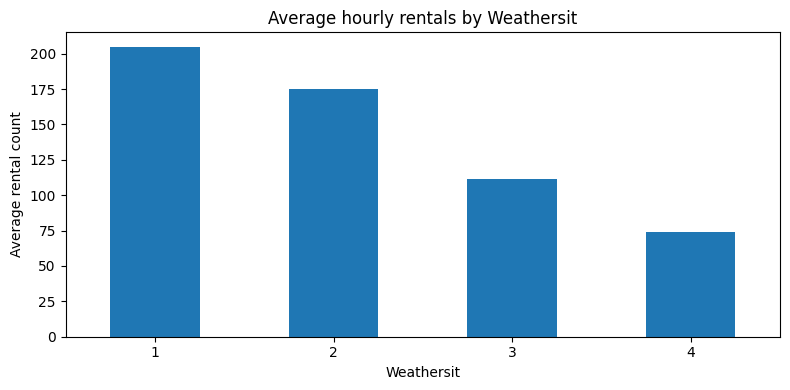

In [23]:
# 1. Histogram of cnt (hour)
plt.figure(figsize=(6,3))
plt.hist(hour['cnt'], bins=50)
plt.title("hour: cnt distribution")
plt.xlabel("cnt")
plt.ylabel("frequency")
plt.show()

# 2. Simple time-series plot (hour) - plotting a subset due to dataset size/noise
plt.figure(figsize=(12,4))
plt.plot(hour['dteday'].iloc[:2000], hour['cnt'].iloc[:2000], linewidth=0.5)
plt.title("Hourly rentals (first 2000 rows)")
plt.xlabel("date"); plt.ylabel("cnt")
plt.tight_layout()
plt.show()

# 3. Correlation matrix for numerical features (hour)
numerical_cols_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix_hour = hour[numerical_cols_hour].corr()
print("\nCorrelation matrix (hour):")
display(correlation_matrix_hour)

# 4. Scatter plots for numerical features vs cnt (hour)
numerical_features_hour = ['temp', 'atemp', 'hum', 'windspeed']
for feature in numerical_features_hour:
    plt.figure(figsize=(8, 4))
    plt.scatter(hour[feature], hour['cnt'], alpha=0.2) # Use alpha for better visualization with many points
    plt.title(f"Hourly rentals vs {feature.capitalize()}")
    plt.xlabel(f"{feature.capitalize()} (normalized)")
    plt.ylabel("Rental count (cnt)")
    plt.tight_layout()
    plt.show()

# 5. Bar plots for categorical features vs cnt (hour)
categorical_features_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features_hour:
    plt.figure(figsize=(8, 4))
    hour.groupby(feature)['cnt'].mean().plot(kind='bar')
    plt.title(f"Average hourly rentals by {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Average rental count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [24]:
# Feature Engineering (Day)
def fe_day(df):
    df = df.copy().sort_values('dteday').reset_index(drop=True)

    # Date parts
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['weekday'] = df['dteday'].dt.weekday

    # Seasonality
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
    df['sin_weekday'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['cos_weekday'] = np.cos(2 * np.pi * df['weekday'] / 7)

    # Trend
    df['trend'] = (df['dteday'] - df['dteday'].min()).dt.days

    # One-hot encode categorical
    df = pd.get_dummies(df, columns=['season','weathersit'], drop_first=True)

    # Final
    drop_cols = ['instant','dteday','casual','registered','cnt']
    X = df.drop(columns=[c for c in drop_cols if c in df.columns])
    y = df['cnt']
    return X, y

X_day, y_day = fe_day(day)
print("Day features:", X_day.shape)

Day features: (731, 21)


In [25]:
# Feature Engineering (Hour)
def fe_hour(df):
    df = df.copy().sort_values('dteday').reset_index(drop=True)

    # Date parts
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['weekday'] = df['dteday'].dt.weekday
    df['hour'] = df['hr'] # 'hr' already exists in hour data

    # Seasonality
    df['sin_month'] = np.sin(2 * np.pi * df['month'] / 12)
    df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
    df['sin_weekday'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['cos_weekday'] = np.cos(2 * np.pi * df['weekday'] / 7)
    df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)


    # Trend
    df['trend'] = (df['dteday'] + pd.to_timedelta(df['hr'], unit='h') - (df['dteday'].min() + pd.to_timedelta(df['hr'].min(), unit='h'))).dt.total_seconds() / (24*3600)


    # One-hot encode categorical
    df = pd.get_dummies(df, columns=['season','weathersit'], drop_first=True)

    # Final
    drop_cols = ['instant','dteday','casual','registered','cnt', 'hr']
    X = df.drop(columns=[c for c in drop_cols if c in df.columns])
    y = df['cnt']
    return X, y

X_hour, y_hour = fe_hour(hour)
print("Hour features:", X_hour.shape)

Hour features: (17379, 25)


In [26]:
from sklearn.model_selection import train_test_split

# Random split for day dataset
X_day_train_rand, X_day_test_rand, y_day_train_rand, y_day_test_rand = train_test_split(
    X_day, y_day, test_size=0.2, random_state=42)

# Time-aware split for day dataset
# Sort data by date before splitting
day_sorted = day.sort_values('dteday').reset_index(drop=True)
X_day_sorted, y_day_sorted = fe_day(day_sorted) # Re-apply feature engineering on sorted data

split_index_day = int(len(day_sorted) * 0.8) # 80% for training, 20% for testing

X_day_train_time = X_day_sorted.iloc[:split_index_day]
X_day_test_time = X_day_sorted.iloc[split_index_day:]
y_day_train_time = y_day_sorted.iloc[:split_index_day]
y_day_test_time = y_day_sorted.iloc[split_index_day:]

print("Day dataset random split shapes:")
print("X_day_train_rand:", X_day_train_rand.shape)
print("X_day_test_rand:", X_day_test_rand.shape)
print("y_day_train_rand:", y_day_train_rand.shape)
print("y_day_test_rand:", y_day_test_rand.shape)

print("\nDay dataset time-aware split shapes:")
print("X_day_train_time:", X_day_train_time.shape)
print("X_day_test_time:", X_day_test_time.shape)
print("y_day_train_time:", y_day_train_time.shape)
print("y_day_test_time:", y_day_test_time.shape)


# Random split for hour dataset
X_hour_train_rand, X_hour_test_rand, y_hour_train_rand, y_hour_test_rand = train_test_split(
    X_hour, y_hour, test_size=0.2, random_state=42)

# Time-aware split for hour dataset
# Sort data by date before splitting
hour_sorted = hour.sort_values('dteday').reset_index(drop=True)
X_hour_sorted, y_hour_sorted = fe_hour(hour_sorted) # Re-apply feature engineering on sorted data


split_index_hour = int(len(hour_sorted) * 0.8) # 80% for training, 20% for testing

X_hour_train_time = X_hour_sorted.iloc[:split_index_hour]
X_hour_test_time = X_hour_sorted.iloc[split_index_hour:]
y_hour_train_time = y_hour_sorted.iloc[:split_index_hour]
y_hour_test_time = y_hour_sorted.iloc[split_index_hour:]

print("\nHour dataset random split shapes:")
print("X_hour_train_rand:", X_hour_train_rand.shape)
print("X_hour_test_rand:", X_hour_test_rand.shape)
print("y_hour_train_rand:", y_hour_train_rand.shape)
print("y_hour_test_rand:", y_hour_test_rand.shape)

print("\nHour dataset time-aware split shapes:")
print("X_hour_train_time:", X_hour_train_time.shape)
print("X_hour_test_time:", X_hour_test_time.shape)
print("y_hour_train_time:", y_hour_train_time.shape)
print("y_hour_test_time:", y_hour_test_time.shape)

Day dataset random split shapes:
X_day_train_rand: (584, 21)
X_day_test_rand: (147, 21)
y_day_train_rand: (584,)
y_day_test_rand: (147,)

Day dataset time-aware split shapes:
X_day_train_time: (584, 21)
X_day_test_time: (147, 21)
y_day_train_time: (584,)
y_day_test_time: (147,)

Hour dataset random split shapes:
X_hour_train_rand: (13903, 25)
X_hour_test_rand: (3476, 25)
y_hour_train_rand: (13903,)
y_hour_test_rand: (3476,)

Hour dataset time-aware split shapes:
X_hour_train_time: (13903, 25)
X_hour_test_time: (3476, 25)
y_hour_train_time: (13903,)
y_hour_test_time: (3476,)


In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

In [28]:

def evaluate_models(X_train, X_test, y_train, y_test, label, split_type):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        results.append({"dataset":label, "split_type": split_type, "model":name, "MAE":mae, "RMSE":rmse, "R2":r2})
    return pd.DataFrame(results)

# Evaluate models on day dataset with random split
res_day_rand = evaluate_models(X_day_train_rand, X_day_test_rand, y_day_train_rand, y_day_test_rand, label="day", split_type="random")

# Evaluate models on day dataset with time-aware split
res_day_time = evaluate_models(X_day_train_time, X_day_test_time, y_day_train_time, y_day_test_time, label="day", split_type="time-aware")

# Evaluate models on hour dataset with random split
res_hour_rand = evaluate_models(X_hour_train_rand, X_hour_test_rand, y_hour_train_rand, y_hour_test_rand, label="hour", split_type="random")

# Evaluate models on hour dataset with time-aware split
res_hour_time = evaluate_models(X_hour_train_time, X_hour_test_time, y_hour_train_time, y_hour_test_time, label="hour", split_type="time-aware")


results_df = pd.concat([res_day_rand, res_day_time, res_hour_rand, res_hour_time])
print(results_df)

  dataset  split_type              model         MAE         RMSE        R2
0     day      random  Linear Regression  599.211063   795.724268  0.842096
1     day      random              Ridge  598.870685   801.430782  0.839823
2     day      random              Lasso  601.844267   801.260774  0.839891
3     day      random      Random Forest  449.096259   713.815415  0.872931
4     day      random        Extra Trees  430.778163   702.142400  0.877053
5     day      random            XGBoost  432.099884   668.208566  0.888649
0     day  time-aware  Linear Regression  910.152763  1203.927100  0.587548
1     day  time-aware              Ridge  931.993101  1241.025284  0.561737
2     day  time-aware              Lasso  926.577419  1230.989312  0.568797
3     day  time-aware      Random Forest  842.456939  1189.611237  0.597298
4     day  time-aware        Extra Trees  991.635102  1164.704389  0.613984
5     day  time-aware            XGBoost  841.085266  1149.204290  0.624190
0    hour   

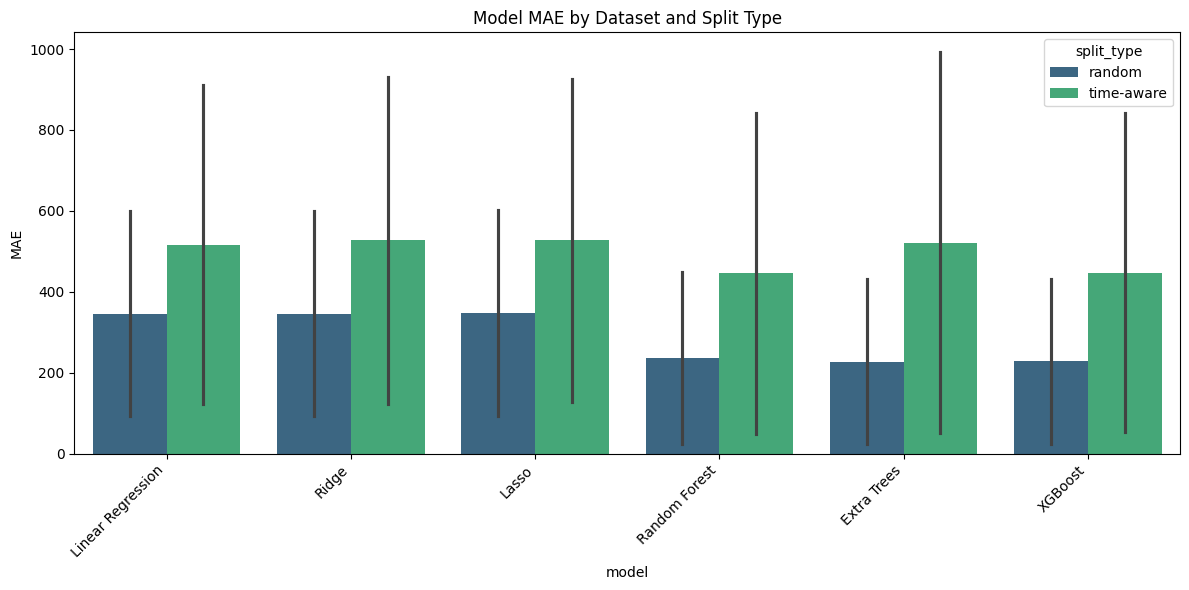

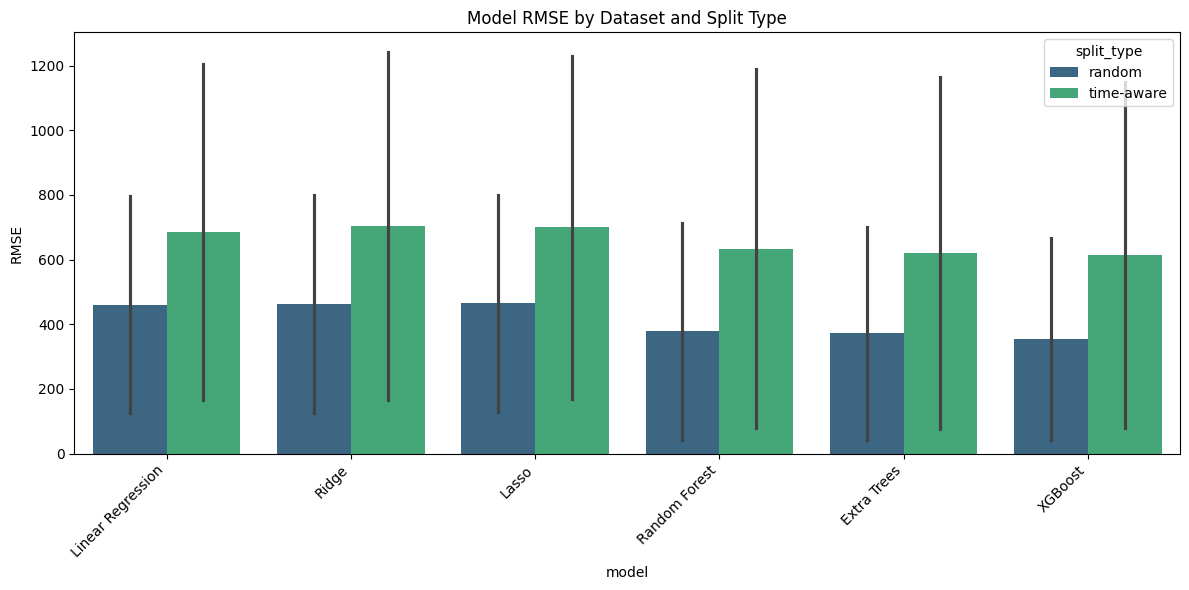

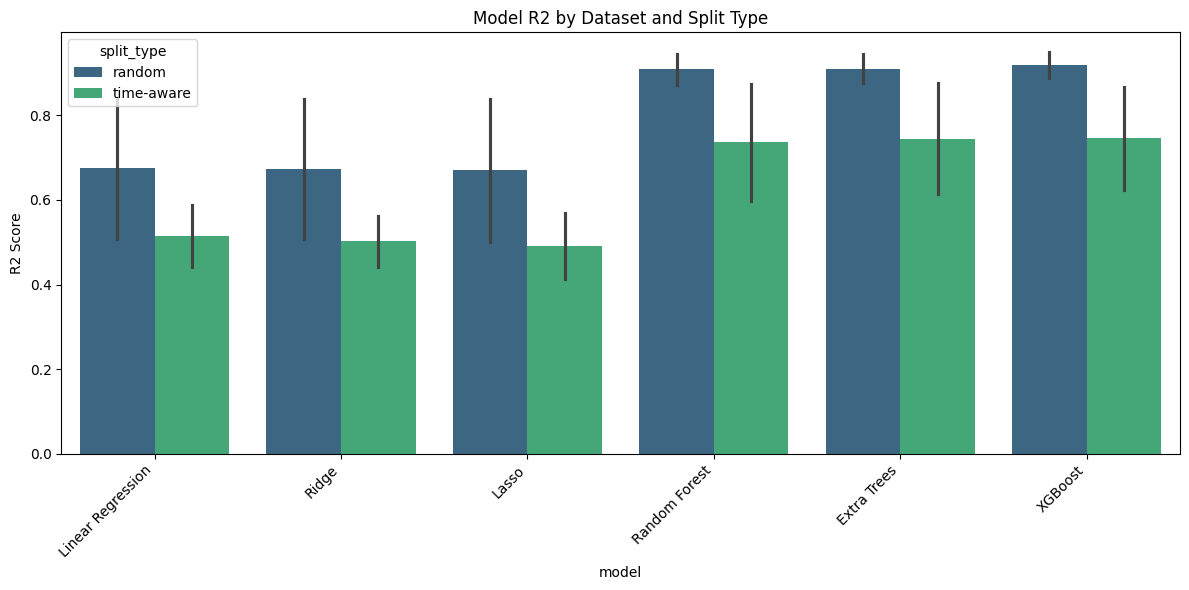

In [29]:
# Visualize model performance (MAE, RMSE, R2)

# Melt the results_df for easier plotting
results_melted = results_df.melt(id_vars=['dataset', 'split_type', 'model'],
                                 value_vars=['MAE', 'RMSE', 'R2'],
                                 var_name='Metric', value_name='Score')

# Plot MAE
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted[results_melted['Metric'] == 'MAE'],
            x='model', y='Score', hue='split_type', palette='viridis')
plt.title('Model MAE by Dataset and Split Type')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted[results_melted['Metric'] == 'RMSE'],
            x='model', y='Score', hue='split_type', palette='viridis')
plt.title('Model RMSE by Dataset and Split Type')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot R2
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted[results_melted['Metric'] == 'R2'],
            x='model', y='Score', hue='split_type', palette='viridis')
plt.title('Model R2 by Dataset and Split Type')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Fine-tune XGBoost for Day Dataset (Time-Aware Split) using Randomized and Grid Search

# Step 1: Select Data
X_train = X_day_train_time
y_train = y_day_train_time
X_test = X_day_test_time
y_test = y_day_test_time

# Step 2: Define a Wide Hyperparameter Distribution for Randomized Search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Step 3: Perform Randomized Search with Cross-Validation
xgb_model = xgb.XGBRegressor(random_state=42)

# Set a reasonable number of iterations for RandomizedSearchCV
n_iter_search = 50

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

print("Performing randomized search for XGBoost (Day Dataset)...")
random_search.fit(X_train, y_train)

print("\nBest parameters from randomized search for XGBoost (Day Dataset):")
best_params_rand_xgb_day = random_search.best_params_
print(best_params_rand_xgb_day)

# Step 4: Define a Narrower Hyperparameter Grid based on Randomized Search results
# Adjust the grid based on the best parameters found in the randomized search.
# This is an example, you would typically refine this based on the actual output
param_grid = {
    'n_estimators': [best_params_rand_xgb_day['n_estimators'] - 100, best_params_rand_xgb_day['n_estimators'], best_params_rand_xgb_day['n_estimators'] + 100],
    'learning_rate': [best_params_rand_xgb_day['learning_rate'] * 0.9, best_params_rand_xgb_day['learning_rate'], best_params_rand_xgb_day['learning_rate'] * 1.1],
    'max_depth': [best_params_rand_xgb_day['max_depth'] - 1, best_params_rand_xgb_day['max_depth'], best_params_rand_xgb_day['max_depth'] + 1],
    'colsample_bytree': [best_params_rand_xgb_day['colsample_bytree'] * 0.9, best_params_rand_xgb_day['colsample_bytree'], best_params_rand_xgb_day['colsample_bytree'] * 1.1],
    'subsample': [best_params_rand_xgb_day['subsample'] * 0.9, best_params_rand_xgb_day['subsample'], best_params_rand_xgb_day['subsample'] * 1.1],
    'gamma': [max(0, best_params_rand_xgb_day['gamma'] - 0.1), best_params_rand_xgb_day['gamma'], best_params_rand_xgb_day['gamma'] + 0.1]
}

# Ensure values are within reasonable bounds (e.g., colsample_bytree, subsample between 0 and 1)
for param in ['learning_rate', 'colsample_bytree', 'subsample', 'gamma']:
    if param in param_grid:
        param_grid[param] = [max(0, p) for p in param_grid[param]]
        if param in ['colsample_bytree', 'subsample']:
             param_grid[param] = [min(1.0, p) for p in param_grid[param]]
        # Remove duplicates and sort
        param_grid[param] = sorted(list(set(param_grid[param])))

# Ensure n_estimators and max_depth are integers
for param in ['n_estimators', 'max_depth']:
     if param in param_grid:
         param_grid[param] = [int(p) for p in param_grid[param] if p is not None and p > 0]
         param_grid[param] = sorted(list(set(param_grid[param])))


print("\nDefined narrower grid for grid search for XGBoost (Day Dataset):")
print(param_grid)


# Step 5: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

print("\nPerforming grid search for XGBoost (Day Dataset)...")
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params_grid_xgb_day = grid_search.best_params_
print("\nBest parameters from grid search for XGBoost (Day Dataset):")
print(best_params_grid_xgb_day)

# Step 6: Train Final Model with Best Hyperparameters
tuned_xgb_model_day = xgb.XGBRegressor(**best_params_grid_xgb_day, random_state=42)
tuned_xgb_model_day.fit(X_train, y_train)

# Step 7: Evaluate Tuned Model
preds_xgb_day = tuned_xgb_model_day.predict(X_test)
mae_xgb_day = mean_absolute_error(y_test, preds_xgb_day)
rmse_xgb_day = np.sqrt(mean_squared_error(y_test, preds_xgb_day))
r2_xgb_day = r2_score(y_test, preds_xgb_day)

print("\nTuned XGBoost Model Performance (Day Dataset, Time-Aware Split - Randomized + Grid Search):")
print(f"MAE: {mae_xgb_day:.4f}")
print(f"RMSE: {rmse_xgb_day:.4f}")
print(f"R2 Score: {r2_xgb_day:.4f}")

# Step 8: Finish task (Summary will be provided in a separate message)

Performing randomized search for XGBoost (Day Dataset)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters from randomized search for XGBoost (Day Dataset):
{'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}

Defined narrower grid for grid search for XGBoost (Day Dataset):
{'n_estimators': [400, 500, 600], 'learning_rate': [0.045000000000000005, 0.05, 0.05500000000000001], 'max_depth': [2, 3, 4], 'colsample_bytree': [0.7200000000000001, 0.8, 0.8800000000000001], 'subsample': [0.63, 0.7, 0.77], 'gamma': [0.19999999999999998, 0.3, 0.4]}

Performing grid search for XGBoost (Day Dataset)...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits

Best parameters from grid search for XGBoost (Day Dataset):
{'colsample_bytree': 0.8, 'gamma': 0.19999999999999998, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 600, 'subsample': 0.63}

Tuned XGBoost Model Performance (Day Dataset, Ti

In [ ]:
# Fine-tune Extra Trees for Hour Dataset (Time-Aware Split) using Randomized and Grid Search

# Step 1: Select Data
X_train = X_hour_train_time
y_train = y_hour_train_time
X_test = X_hour_test_time
y_test = y_hour_test_time

# Step 2: Define a Wide Hyperparameter Distribution for Randomized Search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Step 3: Perform Randomized Search with Cross-Validation
et_model = ExtraTreesRegressor(random_state=42)

# Set a reasonable number of iterations for RandomizedSearchCV
n_iter_search = 50 # Reduced for demonstration, consider increasing for better results

random_search = RandomizedSearchCV(estimator=et_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring='neg_mean_squared_error',
                                   cv=3, verbose=1, random_state=42, n_jobs=-1) # Reduced CV folds for faster execution

print("Performing randomized search for Extra Trees (Hour Dataset)...")
random_search.fit(X_train, y_train)

print("\nBest parameters from randomized search for Extra Trees (Hour Dataset):")
best_params_rand_et_hour = random_search.best_params_
print(best_params_rand_et_hour)

# Step 4: Define a Narrower Hyperparameter Grid based on Randomized Search results
param_grid = {
    'n_estimators': [best_params_rand_et_hour['n_estimators'] - 100, best_params_rand_et_hour['n_estimators'], best_params_rand_et_hour['n_estimators'] + 100],
    'max_depth': [best_params_rand_et_hour['max_depth'] if best_params_rand_et_hour['max_depth'] is None else best_params_rand_et_hour['max_depth'] - 3,
                  best_params_rand_et_hour['max_depth'],
                  best_params_rand_et_hour['max_depth'] if best_params_rand_et_hour['max_depth'] is None else best_params_rand_et_hour['max_depth'] + 3],
    'min_samples_split': [best_params_rand_et_hour['min_samples_split'], best_params_rand_et_hour['min_samples_split'] + 1],
    'min_samples_leaf': [best_params_rand_et_hour['min_samples_leaf'], best_params_rand_et_hour['min_samples_leaf'] + 1],
    'bootstrap': [best_params_rand_et_hour['bootstrap']]
}

# Ensure values are unique and within reasonable bounds
for param in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']:
     if param in param_grid:
         param_grid[param] = [int(p) for p in param_grid[param] if p is not None and p > 0]
         param_grid[param] = sorted(list(set(param_grid[param])))

# Handle max_depth None case explicitly
if 'max_depth' in param_grid and None in [best_params_rand_et_hour['max_depth']]:
    param_grid['max_depth'].append(None)
    param_grid['max_depth'] = sorted(list(set(param_grid['max_depth'])), key=lambda x: (x is not None, x))


print("\nDefined narrower grid for grid search for Extra Trees (Hour Dataset):")
print(param_grid)


# Step 5: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=ExtraTreesRegressor(random_state=42), param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

print("Performing grid search for Extra Trees (Hour Dataset)...")
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params_grid_et_hour = grid_search.best_params_
print("\nBest parameters from grid search for Extra Trees (Hour Dataset):")
print(best_params_grid_et_hour)


# Step 6: Train Final Model with Best Hyperparameters
tuned_et_model_hour = ExtraTreesRegressor(**best_params_grid_et_hour, random_state=42)
tuned_et_model_hour.fit(X_train, y_train)

# Step 7: Evaluate Tuned Model
preds_et_hour = tuned_et_model_hour.predict(X_test)
mae_et_hour = mean_absolute_error(y_test, preds_et_hour)
rmse_et_hour = np.sqrt(mean_squared_error(y_test, preds_et_hour))
r2_et_hour = r2_score(y_test, preds_et_hour)

print("\nTuned Extra Trees Model Performance (Hour Dataset, Time-Aware Split - Randomized + Grid Search):")
print(f"MAE: {mae_et_hour:.4f}")
print(f"RMSE: {rmse_et_hour:.4f}")
print(f"R2 Score: {r2_et_hour:.4f}")

# Step 8: Finish task (Summary will be provided in a separate message)

Performing randomized search for Extra Trees (Hour Dataset)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
